In [1]:
import omicverse as ov
#import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ov.ov_plot_set()



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.4, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [2]:
import os
meta_li=[i for i in os.listdir('result') if 'meta' in i]
raw_li=[i for i in os.listdir('result') if ('meta' not in i)&('ipy' not in i)&('pth' not in i)&('xlsx' not in i)]

In [7]:
raw_li=['hsc_raw_coef.csv','dg_raw_coef.csv','pancera_raw_coef.csv']

In [8]:
raw_dict={}
for i in raw_li:
    raw_dict[i.split('_')[0]]=pd.read_csv(f"result/{i}",index_col=0)

In [76]:
raw_dict

{'hsc':                mse      rmse       mae        r2  num_genes  Kendalltau  \
 pearsonr  0.004276  0.065394  0.047175  0.920113      125.0    0.382785   
 omicfate  0.003026  0.055005  0.038913  0.943480       74.0    0.690959   
 
           Linregress  
 pearsonr    0.372667  
 omicfate    0.559452  ,
 'dg':                   mse      rmse       mae        r2  num_genes  Kendalltau  \
 pearsonr     0.005783  0.076047  0.054288  0.875072      146.0    0.758071   
 omicfate     0.008826  0.093948  0.071969  0.809333      106.0    0.877412   
 likelihoods  0.008046  0.089699  0.065664  0.826190      200.0    0.872844   
 
              Linregress  
 pearsonr       0.715595  
 omicfate       0.913941  
 likelihoods    0.901087  ,
 'pancera':                   mse      rmse       mae        r2  num_genes  Kendalltau  \
 pearsonr     0.002197  0.046877  0.036625  0.978669      290.0    0.927444   
 omicfate     0.003624  0.060198  0.047534  0.964824      152.0    0.911992   
 likeliho

## Linregress

In [71]:
name='Linregress'
plot_data=pd.DataFrame(columns=[name,'dataset','method'])
for i in raw_dict.keys():
    p1=pd.DataFrame(raw_dict[i][name])
    p1['dataset']=i
    p1['method']=p1.index
    plot_data=pd.concat([plot_data,p1],ignore_index=True)
plot_data['dataset']=plot_data['dataset'].map({
    'hsc':'HSC',
    'dg':'DG',
    'pancera':'Pancreas',
})
plot_data

,Linregress,dataset,method
0,0.372667,HSC,pearsonr
1,0.559452,HSC,omicfate
2,0.715595,DG,pearsonr
3,0.913941,DG,omicfate
4,0.901087,DG,likelihoods
5,0.883292,Pancreas,pearsonr
6,0.951861,Pancreas,omicfate
7,0.962838,Pancreas,likelihoods


In [72]:
ov.plot_set()

All dependencies are satisfied.


In [73]:
color_dict=dict(zip(methods,
                   ov.pl.sc_color[1:4]))

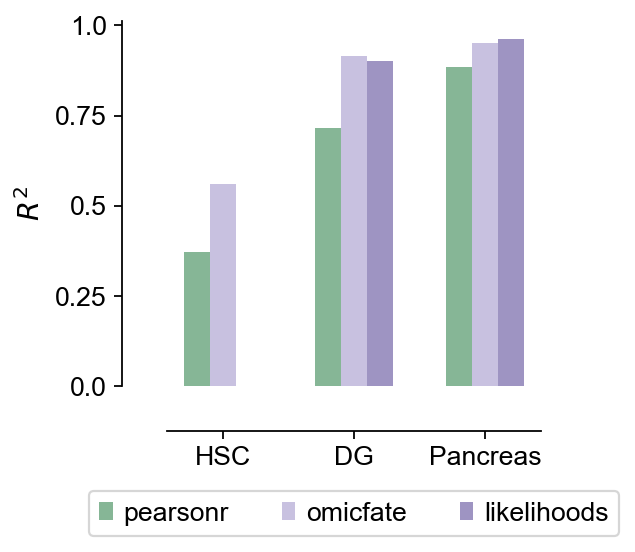

In [74]:
# 获取唯一的dataset和method
datasets = plot_data['dataset'].unique()
methods = plot_data['method'].unique()

# 设置柱状图的位置和宽度
x = np.arange(len(datasets))
width = 0.2

# 创建一个图表
fig, ax = plt.subplots(figsize=(3, 3))

# 为每种方法绘制柱状图
for i, method in enumerate(methods):
    mse_values = []
    for dataset in datasets:
        value = plot_data[(plot_data['method'] == method) & (plot_data['dataset'] == dataset)][name]
        mse_values.append(value.values[0] if not value.empty else 0)
    ax.bar(x + i * width, mse_values, width, label=method, alpha=0.6,color=color_dict[method])

ax.spines['left'].set_position(('outward', 20))
ax.spines['bottom'].set_position(('outward', 20))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
ax.set_xticks(x + width)
ax.set_xticklabels(datasets,  fontsize=12,rotation=0)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5,-.25),
          title='', fontsize=12,ncols=3)

plt.savefig(f'figures/metric/bar-{name}-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/metric/bar-{name}-33.pdf',dpi=300,bbox_inches='tight')




## MSE

In [77]:
name='mse'
plot_data=pd.DataFrame(columns=[name,'dataset','method'])
for i in raw_dict.keys():
    p1=pd.DataFrame(raw_dict[i][name])
    p1['dataset']=i
    p1['method']=p1.index
    plot_data=pd.concat([plot_data,p1],ignore_index=True)
plot_data['dataset']=plot_data['dataset'].map({
    'hsc':'HSC',
    'dg':'DG',
    'pancera':'Pancreas',
})
plot_data

,mse,dataset,method
0,0.004276,HSC,pearsonr
1,0.003026,HSC,omicfate
2,0.005783,DG,pearsonr
3,0.008826,DG,omicfate
4,0.008046,DG,likelihoods
5,0.002197,Pancreas,pearsonr
6,0.003624,Pancreas,omicfate
7,0.004496,Pancreas,likelihoods


In [78]:
ov.plot_set()

All dependencies are satisfied.


In [79]:
color_dict=dict(zip(methods,
                   ov.pl.sc_color[1:4]))

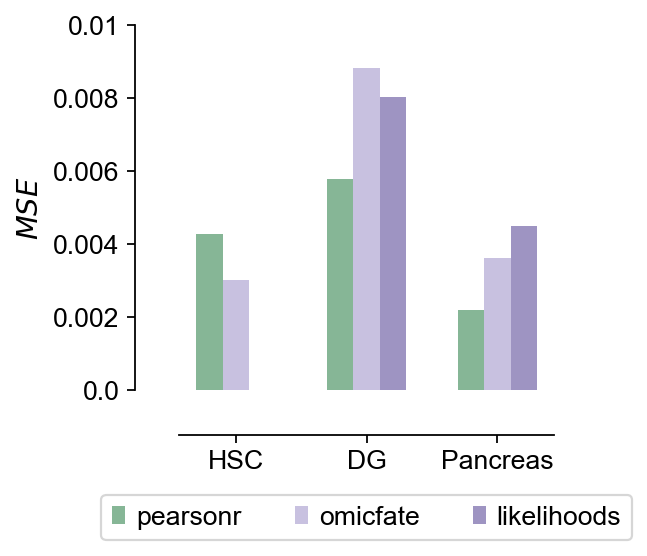

In [84]:
# 获取唯一的dataset和method
datasets = plot_data['dataset'].unique()
methods = plot_data['method'].unique()

# 设置柱状图的位置和宽度
x = np.arange(len(datasets))
width = 0.2

# 创建一个图表
fig, ax = plt.subplots(figsize=(3, 3))

# 为每种方法绘制柱状图
for i, method in enumerate(methods):
    mse_values = []
    for dataset in datasets:
        value = plot_data[(plot_data['method'] == method) & (plot_data['dataset'] == dataset)][name]
        mse_values.append(value.values[0] if not value.empty else 0)
    ax.bar(x + i * width, mse_values, width, label=method, alpha=0.6,color=color_dict[method])

ax.spines['left'].set_position(('outward', 20))
ax.spines['bottom'].set_position(('outward', 20))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$MSE$', fontsize=13)
ax.set_title('', fontsize=13)
ax.set_xticks(x + width)
ax.set_xticklabels(datasets,  fontsize=12,rotation=0)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5,-.25),
          title='', fontsize=12,ncols=3)
ax.set_ylim(0,0.01)

plt.savefig(f'figures/metric/bar-{name}-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/metric/bar-{name}-33.pdf',dpi=300,bbox_inches='tight')




## MAE

In [85]:
name='mae'
plot_data=pd.DataFrame(columns=[name,'dataset','method'])
for i in raw_dict.keys():
    p1=pd.DataFrame(raw_dict[i][name])
    p1['dataset']=i
    p1['method']=p1.index
    plot_data=pd.concat([plot_data,p1],ignore_index=True)
plot_data['dataset']=plot_data['dataset'].map({
    'hsc':'HSC',
    'dg':'DG',
    'pancera':'Pancreas',
})
plot_data

,mae,dataset,method
0,0.047175,HSC,pearsonr
1,0.038913,HSC,omicfate
2,0.054288,DG,pearsonr
3,0.071969,DG,omicfate
4,0.065664,DG,likelihoods
5,0.036625,Pancreas,pearsonr
6,0.047534,Pancreas,omicfate
7,0.051888,Pancreas,likelihoods


In [86]:
ov.plot_set()

All dependencies are satisfied.


In [87]:
color_dict=dict(zip(methods,
                   ov.pl.sc_color[1:4]))

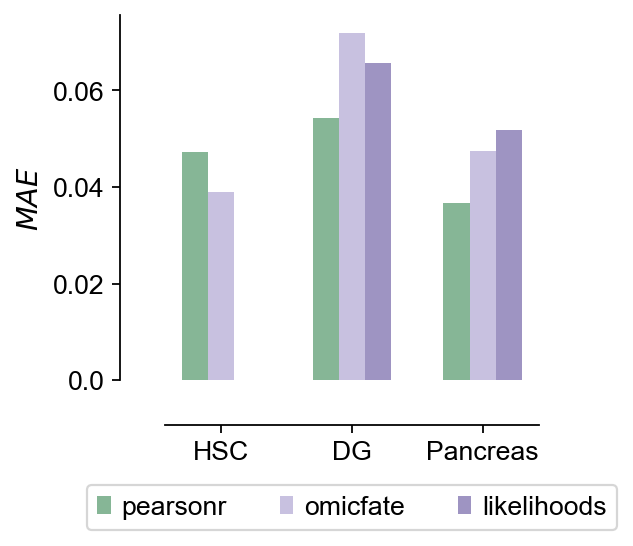

In [89]:
# 获取唯一的dataset和method
datasets = plot_data['dataset'].unique()
methods = plot_data['method'].unique()

# 设置柱状图的位置和宽度
x = np.arange(len(datasets))
width = 0.2

# 创建一个图表
fig, ax = plt.subplots(figsize=(3, 3))

# 为每种方法绘制柱状图
for i, method in enumerate(methods):
    mse_values = []
    for dataset in datasets:
        value = plot_data[(plot_data['method'] == method) & (plot_data['dataset'] == dataset)][name]
        mse_values.append(value.values[0] if not value.empty else 0)
    ax.bar(x + i * width, mse_values, width, label=method, alpha=0.6,color=color_dict[method])

ax.spines['left'].set_position(('outward', 20))
ax.spines['bottom'].set_position(('outward', 20))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$MAE$', fontsize=13)
ax.set_title('', fontsize=13)
ax.set_xticks(x + width)
ax.set_xticklabels(datasets,  fontsize=12,rotation=0)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5,-.25),
          title='', fontsize=12,ncols=3)
#ax.set_ylim(0,0.01)

plt.savefig(f'figures/metric/bar-{name}-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/metric/bar-{name}-33.pdf',dpi=300,bbox_inches='tight')




## num_genes

In [90]:
name='num_genes'
plot_data=pd.DataFrame(columns=[name,'dataset','method'])
for i in raw_dict.keys():
    p1=pd.DataFrame(raw_dict[i][name])
    p1['dataset']=i
    p1['method']=p1.index
    plot_data=pd.concat([plot_data,p1],ignore_index=True)
plot_data['dataset']=plot_data['dataset'].map({
    'hsc':'HSC',
    'dg':'DG',
    'pancera':'Pancreas',
})
plot_data

,num_genes,dataset,method
0,125.0,HSC,pearsonr
1,74.0,HSC,omicfate
2,146.0,DG,pearsonr
3,106.0,DG,omicfate
4,200.0,DG,likelihoods
5,290.0,Pancreas,pearsonr
6,152.0,Pancreas,omicfate
7,200.0,Pancreas,likelihoods


In [91]:
ov.plot_set()

All dependencies are satisfied.


In [92]:
color_dict=dict(zip(methods,
                   ov.pl.sc_color[1:4]))

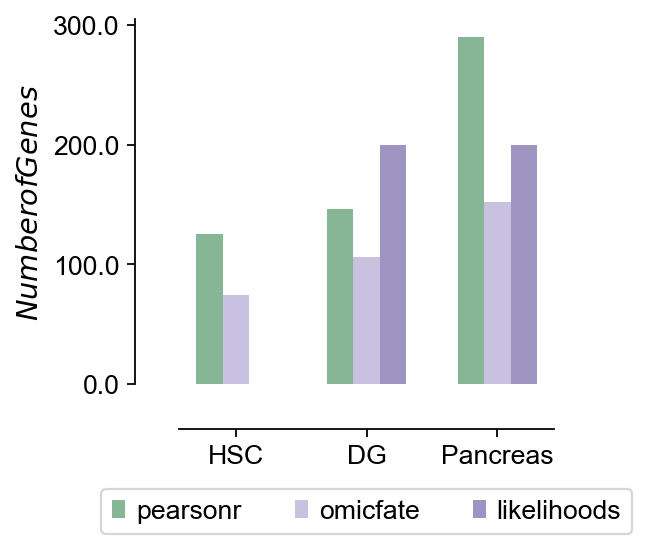

In [93]:
# 获取唯一的dataset和method
datasets = plot_data['dataset'].unique()
methods = plot_data['method'].unique()

# 设置柱状图的位置和宽度
x = np.arange(len(datasets))
width = 0.2

# 创建一个图表
fig, ax = plt.subplots(figsize=(3, 3))

# 为每种方法绘制柱状图
for i, method in enumerate(methods):
    mse_values = []
    for dataset in datasets:
        value = plot_data[(plot_data['method'] == method) & (plot_data['dataset'] == dataset)][name]
        mse_values.append(value.values[0] if not value.empty else 0)
    ax.bar(x + i * width, mse_values, width, label=method, alpha=0.6,color=color_dict[method])

ax.spines['left'].set_position(('outward', 20))
ax.spines['bottom'].set_position(('outward', 20))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$Number of Genes$', fontsize=13)
ax.set_title('', fontsize=13)
ax.set_xticks(x + width)
ax.set_xticklabels(datasets,  fontsize=12,rotation=0)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5,-.25),
          title='', fontsize=12,ncols=3)
#ax.set_ylim(0,0.01)

plt.savefig(f'figures/metric/bar-{name}-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/metric/bar-{name}-33.pdf',dpi=300,bbox_inches='tight')




## Kendalltau

In [94]:
name='Kendalltau'
plot_data=pd.DataFrame(columns=[name,'dataset','method'])
for i in raw_dict.keys():
    p1=pd.DataFrame(raw_dict[i][name])
    p1['dataset']=i
    p1['method']=p1.index
    plot_data=pd.concat([plot_data,p1],ignore_index=True)
plot_data['dataset']=plot_data['dataset'].map({
    'hsc':'HSC',
    'dg':'DG',
    'pancera':'Pancreas',
})
plot_data

,Kendalltau,dataset,method
0,0.382785,HSC,pearsonr
1,0.690959,HSC,omicfate
2,0.758071,DG,pearsonr
3,0.877412,DG,omicfate
4,0.872844,DG,likelihoods
5,0.927444,Pancreas,pearsonr
6,0.911992,Pancreas,omicfate
7,0.903738,Pancreas,likelihoods


In [95]:
ov.plot_set()

All dependencies are satisfied.


In [96]:
color_dict=dict(zip(methods,
                   ov.pl.sc_color[1:4]))

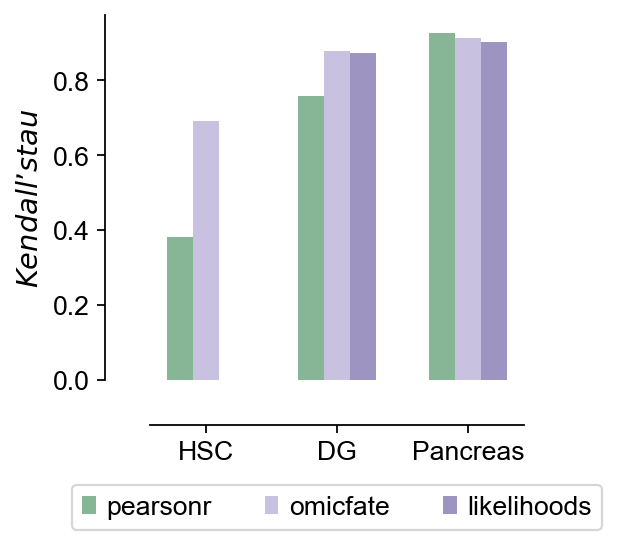

In [99]:
# 获取唯一的dataset和method
datasets = plot_data['dataset'].unique()
methods = plot_data['method'].unique()

# 设置柱状图的位置和宽度
x = np.arange(len(datasets))
width = 0.2

# 创建一个图表
fig, ax = plt.subplots(figsize=(3, 3))

# 为每种方法绘制柱状图
for i, method in enumerate(methods):
    mse_values = []
    for dataset in datasets:
        value = plot_data[(plot_data['method'] == method) & (plot_data['dataset'] == dataset)][name]
        mse_values.append(value.values[0] if not value.empty else 0)
    ax.bar(x + i * width, mse_values, width, label=method, alpha=0.6,color=color_dict[method])

ax.spines['left'].set_position(('outward', 20))
ax.spines['bottom'].set_position(('outward', 20))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$Kendall’s tau$', fontsize=13)
ax.set_title('', fontsize=13)
ax.set_xticks(x + width)
ax.set_xticklabels(datasets,  fontsize=12,rotation=0)
ax.set_yticklabels([round(i,2) for i in ax.get_yticks()], fontsize=12)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5,-.25),
          title='', fontsize=12,ncols=3)
#ax.set_ylim(0,0.01)

plt.savefig(f'figures/metric/bar-{name}-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/metric/bar-{name}-33.pdf',dpi=300,bbox_inches='tight')


